## Lecture 5

### 1. Simple Linear Regression : Protein vs mRNA (per gene)

```r
lm(protein~mrna, data=dat_419)
```

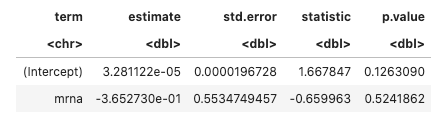

- For every unit increase in `mrna`, the protein level is predicted to increase in 4.027 (??). This value is not significantly different from 0 at 5% significance.
- Right conclusion: We fail to reject the null hypothesis that protein and mRNA are related for this: $H_0 : r_g = 0$
    - We don't have enough evidence to conclude that protein and mRNA are related for this gene. 

### 2. Multiple Linear Regression: Protein vs `gene`

- There are three levels of gene in the dataset (artificial)

```r
lm_g <- lm(protein~gene, data=dat_3genes)
```

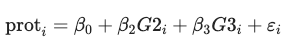

- `lm` creates two dummy variables

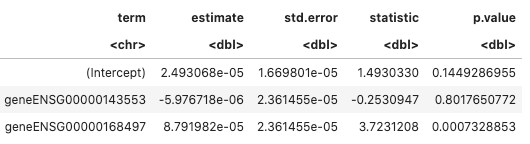

- The mean protein concentration of gene ENSG00000143553 is not significantly different (5.976718e-06 units lower) from that of gene ENSG00000085733 (reference) at a 5% significance level.
- The mean protein concentration of gene ENSG00000168497 is significantly different (8.791982e-05 units larger) from that of gene ENSG00000085733 (reference) at a significance level of 5%.
- Note that the difference between the sample means are very small. However, in terms of the variation observed in the data, these numbers are not so small. The statistic measures the difference in terms of the SE of the estimator!

### 3. MLR : 1 quantitative, 1 categorical variables
#### 3.1 Additive model

$$\text{prot}_i=\beta_0 + \beta_1 \text{mrna}_{i} + \beta_2 \text{G2}_{i} + \beta_3 \text{G3}_{i} + \varepsilon_i$$


**Assumptions**
- The variables $G2$ and $G3$ are dummy variables that take only 2 values, 0 and 1.
    - $G2=0$ and $G3=0$ for gene ENSG00000085733.
        - Becomes a SLR with intercept $\beta_0$ and slope $\beta_1$ to model the relation between `protein` and `mrna`
    - G2 = 1 for gene ENSG00000143553, and it's 0 otherwise
        - Becomes a SLR with the same slope $\beta_1$ to model the relation between `protein` and `mrna`
        - The intercept : $\beta_0 + \beta_2$
    - G3 = 1 for gene ENSG00000168497, and it's 0 otherwise
        - Becomes a SLR with the same slope $\beta_1$ to model the relation between `protein` and `mrna`
        - The intercept : $\beta_0 + \beta_3$
    > Intercept changes!
    

**Interpretation**

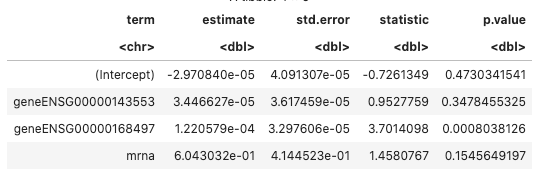

- The second estimate : intercept difference between the gene553 model and the base gene model
- The third estimate : intercept difference between the gene497 model and the base gene model
- The `mrna` estimate : the common slope
    - The lines are parallel:
        - We model a unique slope $\beta_1$ for both levels
        - We assume that the relation between protein and mRNA is the same for all genes
        
     
**Standard Errors and Tests**

SE are estimated with results from asymptotic theory by `lm` but you can obtained them bootstrapping from the original sample!

The tests are as before "$H_0$: parameters=0" but the parameters have different meanings now:

- Is the intercept of the reference gene equal to 0?

$$H_0: \beta_0=0 \; vs \; H_1: \beta_0 \ne 0$$


- Is the intercept of the second gene that same as that of the reference gene? (similar for 3rd gene, $\beta_3$)

$$H_0: \beta_2=0 \; vs \; H_1: \beta_2 \ne 0$$


- Is the (common) slope equal to 0?

$$H_0: \beta_1=0 \; vs \; H_1: \beta_1 \ne 0$$


#### 3.2 Model with interation term
- Is the relation between protein and mRNA the same for all genes?
- If we want to model different slopes for different genes, we need to add **interaction terms in the model**!

$$\text{prot}_i = \beta_0 + \beta_1 \text{mrna}_{i} + \beta_2 G2_{i}  + \beta_3 G3_{i}  + \beta_4 G2_{i} * \text{mrna}_{i} + \beta_5 G3_{i} * \text{mrna}_{i} +\varepsilon_i$$

> Add more terms with are the multiplication of both variables
>
> Note that the dummy variables change the intercepts and the slopes of ENSG00000143553 and ENSG00000168497

**Assumptions**
- We are not assuming that groups share a slope! (lines are not parallel!)
- When both dummies are zero : $\text{prot}_i = \beta_0 + \beta_1 \text{mrna}_{i}+\varepsilon_i$ (SLR for the reference line!)**

- The other 2 lines now have *different intercepts* and *different slopes*!!
    - *Gene 2*: intercept = $\beta_0 + \beta_2$; slope = $\beta_1 + \beta_4$ (G2 == 1) --> slope is also changing!!! 
    - *Gene 3*: intercept = $\beta_0 + \beta_3$; slope = $\beta_1 + \beta_5$

> comparisons are *always* with respect to the reference gene!!

**Estimates**

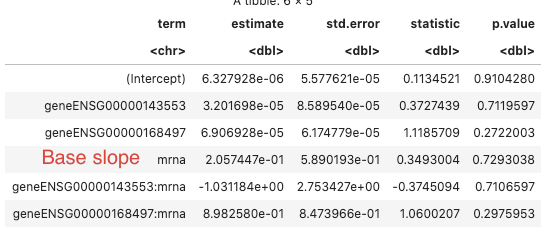

* **slopes**
    - `mrna` ($\hat{\beta_1}$) -> Base slope  (reference gene)
        - It measures the predicted increase in the protein level for every unit increase in mRNA level for gene `ENSG00000085733` (reference gene)
    - `mrna` + `geneENSG00000143553:mrna` ($\hat{\beta_4}$) -> G2 slope
        - $\hat{\beta_4}$ = difference between the base slope and the estimated slope of the SLR of G2
            - It measures the additional change in protein level for every unit change in mRNA for $G2$ compared to the reference gene.
    - `mrna` + `geneENSG00000168497:mrna` ($\hat{\beta_5}$) -> G3 slope
        - $\hat{\beta_5}$ = difference between the base slope and the estimated slope of the SLR of G3
            - It measures the additional change in protein level for every unit change in mRNA for $G3$ compared to the reference gene.
    
* **intercepts**
    - `intercept` -> Base intercept 
    - `intercept` + `geneENSG00000143553` ($\hat{\beta_2}$) -> G2 intercept
        - $\hat{\beta_2}$ = difference between the base intercept and the SLR of G2 intercept 
    - `intercept` + `geneENSG00000168497` ($\hat{\beta_3}$) -> G3 intercept
        - $\hat{\beta_3}$ = difference between the base intercept and the SLR of G3 intercept

**Standard errors, tests, prediction**

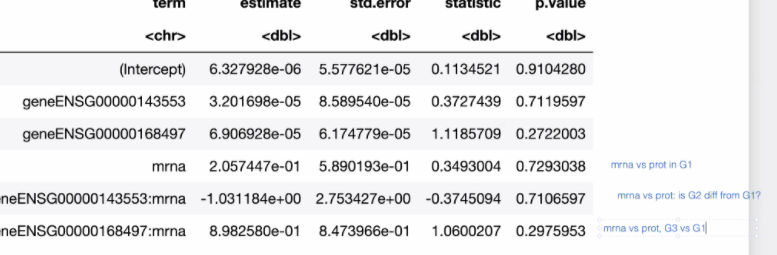

- Testing
    - "Is **the slope** of $G2$ the same as **the slope** of the reference gene?"
        - $H_0 : \beta_4 = 0$ (diff in slopes)
    - "Is the slope of $G3$ the same as the slope of the reference gene?"
        - $H_0 : \beta_5 = 0$ (diff in slopes)
    - p-value of `mrna` is the only one talking about `mrna` vs `protein`. 
    - In both cases, we fail to reject the null hypothesis that the difference of the slopes is zero.

## Video 3

1. What `lm` does?
- It uses a methodology called "least square"
- The least square estimation is the sum of the squared errors. 
- Errors are distance between each point to the line.
- You want to minimize the sum of squared errors. 

- Disadvantages:
    - very sensitive to bias (outliers)
        - moving one point will change the line
    - very unstable with correlated features
    - when we don't have enough examples but we do have a lot of variables, then we cannot compute with this method. 

2. How to interpret and communicate the results
- We cannot draw "causality"
- Stay away from the terms "cause", "effect"
    - use "associated", "related"
- observational data, LS -> no causality
- They measure association!

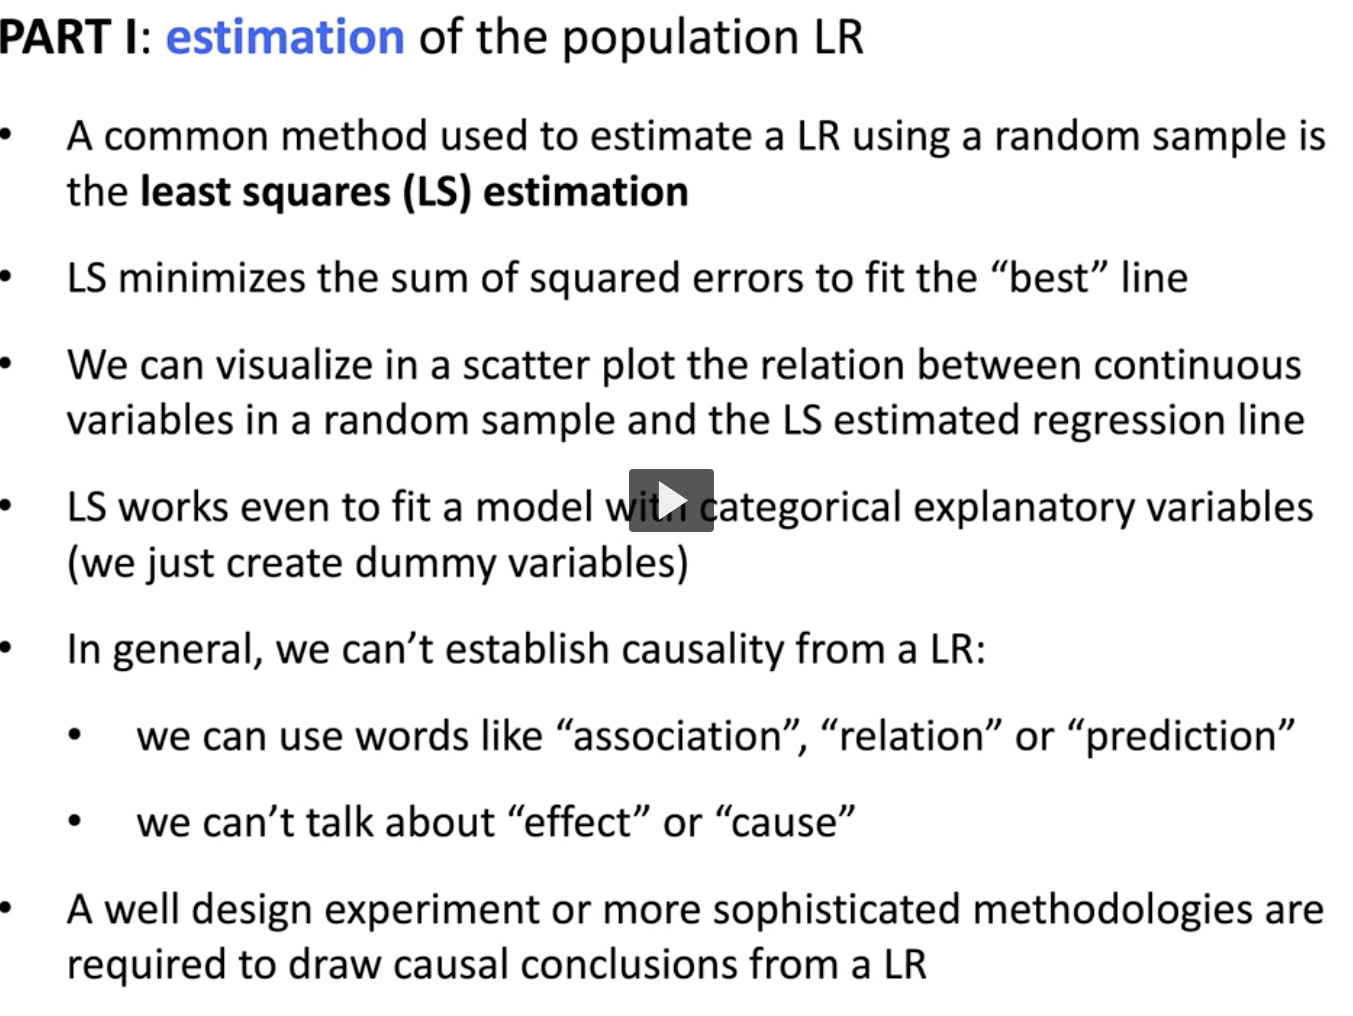

## Video 4 : Inference
- $\beta$ : unknown
- $\hat{\beta}$ : measured 
    - We are going to use this to infer $\beta$
    - How good is our guess?
   

1. Sampling distribution
- Its unknown

1) Assuming normality
    
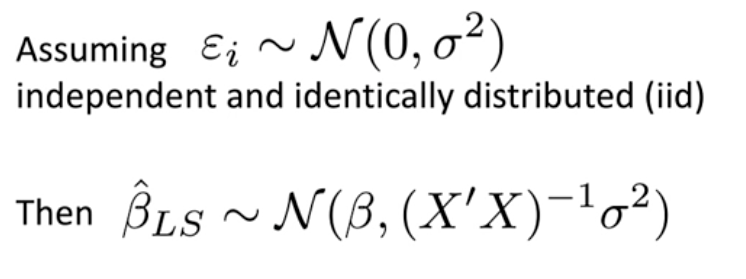
    
    - Errors are normal
    - All have the same variance 
    - We can get exact sampling distribution based on this assumption


2) Large sample
    
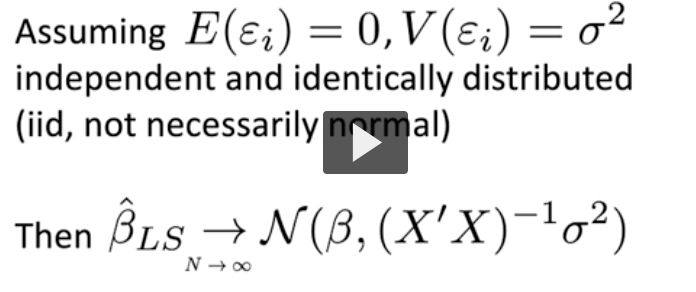
    
    - We don't assume that errors are normal
    - We're still assume that they are coming from the same distribution
    - Asymptotic Normal
    - Approximation asymptotic sampling distribution

3) Bootstrapping : not assuming anything

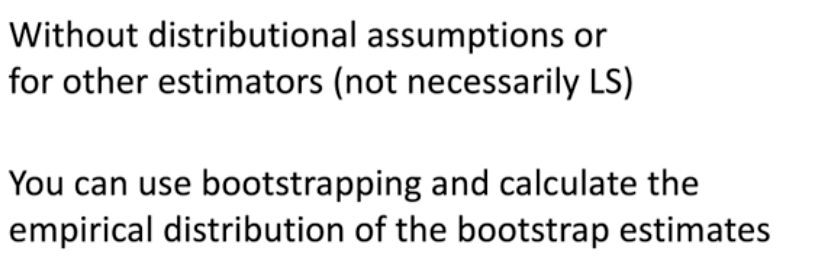
    
    - We're going to resample our sample
    - so we get a lot of beta hats
    - empirical distribution
    - approximate sampling distribution

2. CIs


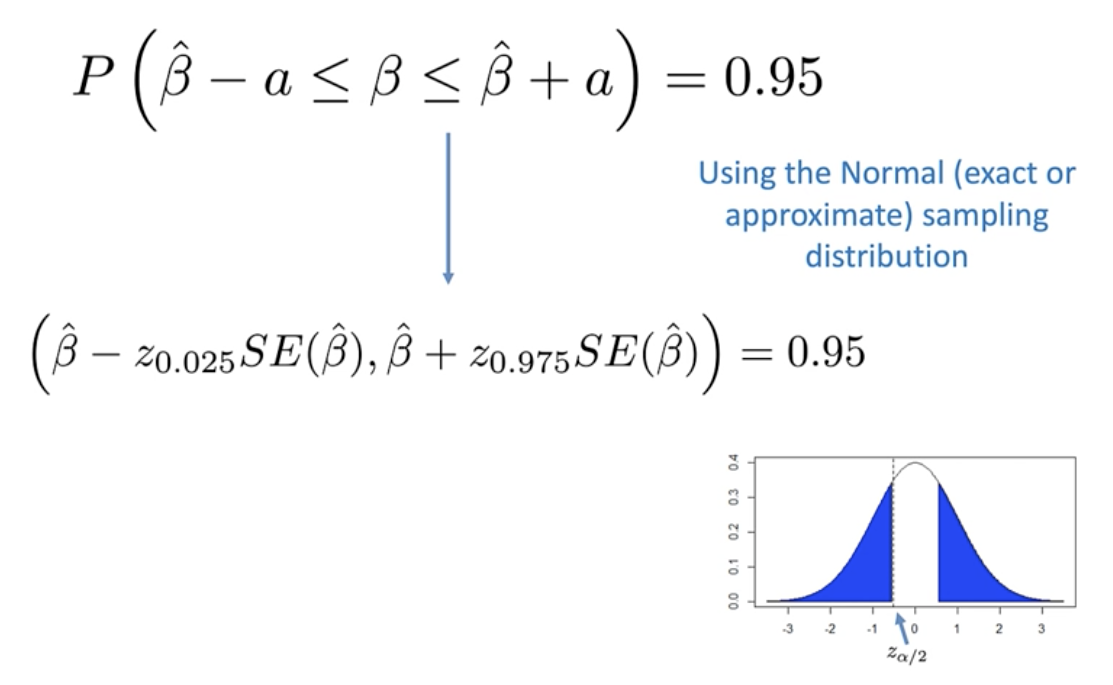

- 95% probability in the middle. (normal)
- If you're using bootstrap sampling distribution, then you can use the quantiles of the bootstrap estimates

```r
quantile(slope_B, 0.025)
quantile(slope_B, 0.975)
```


3. What can we say about our results?
- CIs
    - 95% "confident" that the true parameter will be captured.
    - 100 sample -> 95 will contain the true parameter.

- Hypothesis test

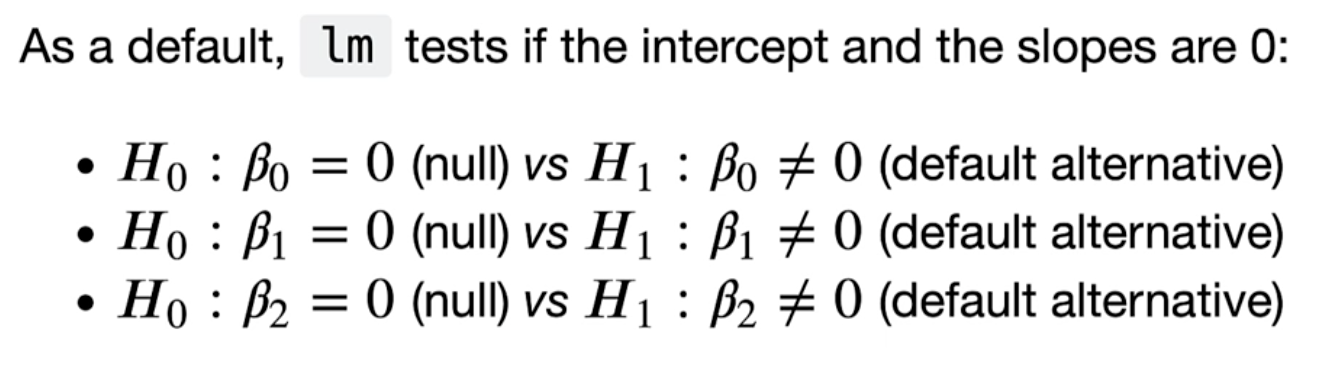

    - `lm` gives you tests

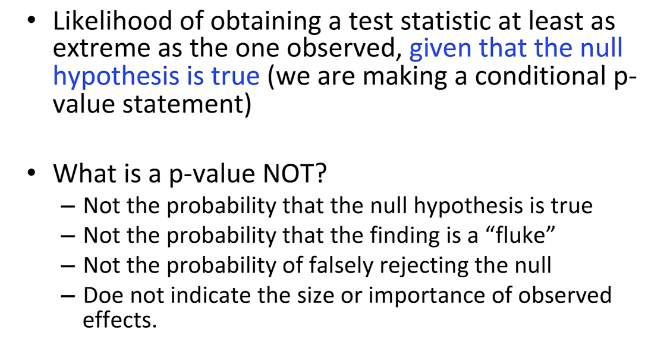

    - p-value:
    - Under the null hypothesis, if the null hypothesis is true, what is the probability of observing a statistic as large or more than the one that you're observing.
    - p-value > alpha
        - fail to reject 
        - You don't have enough evidence that the explanatory variable is related to the response variable.
    - p-value < alpha
        - reject H_0
        - They are related
        - Explanatory variable is significantly related to the response.
        
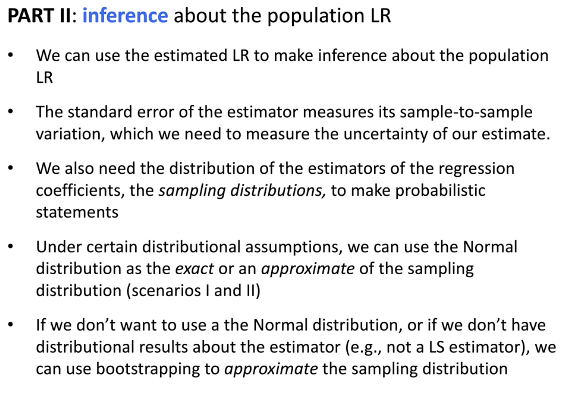
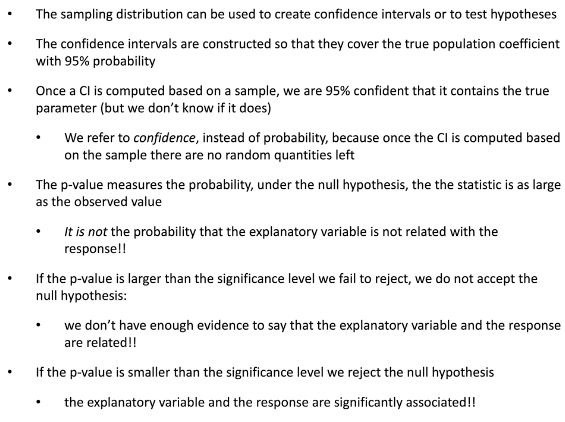